<a href="https://colab.research.google.com/github/akbarriki/scraping_tiketcom/blob/main/Scraping_Tiketcom_BestPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scraping Best Price for Flights from Jakarta to Selected Airports in Indonesia**

##This dataset is collected from [Tiket.com](https://tiket.com), an Online Travel Agent Platform in Indonesia

Author: [Riki Akbar](https://akbarriki.github.io)
<br />Last update: 2 February 2023<br />Dataset is now available [here](https://www.kaggle.com/datasets/datasciencerikiakbar/tiketcom-best-price-for-flights-from-jakarta)

Feel free to make any code adjustment but **please keep the attribution remains**


In [1]:
# *************************************************
# Author      : Riki Akbar (http://github.com/akbarriki)
# Last Update : 2 February 2023

# Please keep this attribution remains. Thanks.
# *************************************************

###Imports and Mounting Drive

In [2]:
import pandas as pd
import requests, json, time, math, os
from tqdm import tqdm
from datetime import datetime as dt
from datetime import date
from calendar import monthrange
from dateutil.relativedelta import relativedelta
from google.colab import drive

#mounting google drive
drive.mount('/content/gdrive', force_remount=True)
project_folder = 'gdrive/MyDrive/scraping_projects/tiketcom'
output_file = 'tiketcom_bestprice.csv'
os.chdir(project_folder)
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive/MyDrive/scraping_projects/tiketcom'

### Scraping

In [3]:
# define execution timestamp
exec_timestamp = dt.now()

# define all required variables
base_url = 'https://www.tiket.com/'

# target list
_data_ = []

num_adult, num_child, num_infant = 1, 0, 0
_ORIGIN_, _ORIGINTYPE_ = 'JKTC', 'CITY'
# _DESTINATION_, _DESTINATIONTYPE_ = 'BTJ', 'AIRPORT'
_CABINCLASS_ = 'ECONOMY'

target_year = date.today().year + 1

selecteddate = '2023-04-19'
startdate = '2023-04-01'
enddate = '2023-04-30'

_DESTINATIONLIST_ = ['BTJ','BDO','MLG','SRG','SUB','JOG','YIA','SOC','TKG','BTH',
                     'BKS','DJB','KNO','PDG','PLM','PGK','PKU','TNJ','BPN','BDJ',
                     'PNK','SRI','TRK','UPG','MDC','DPS','LOP','BIK','DJJ','MKQ']

for i, _DESTINATION_ in enumerate(_DESTINATIONLIST_):
  print(_DESTINATION_)
  for m in tqdm(range(6)):
        
    # define current month, number of days in current month, and default selected date (default selected date for april 2023 is 19)
    cdate = (dt.today() + relativedelta(months=m))
    cyear, cmonth = cdate.year, cdate.month
    startdate = dt.strftime(date(cyear, cmonth, 1), "%Y-%m-%d")
    enddate = dt.strftime(date(cyear, cmonth, monthrange(cyear, cmonth)[-1]), "%Y-%m-%d")
    selecteddate = dt.strftime(date(cyear, cmonth, 15), "%Y-%m-%d") if cmonth != 4 else dt.strftime(date(cyear, cmonth, 19), "%Y-%m-%d")
    
    # define the type of destination (i.e., CITY or AIRPORT)
    _DESTINATIONTYPE_ = 'AIRPORT'

    # target url
    url = f'{base_url}ms-gateway/tix-price-summary/priceSummary/priceSummary?adult={num_adult}&child={num_child}&infant={num_infant}&origin={_ORIGIN_}&destination={_DESTINATION_}&startDate={startdate}&endDate={enddate}&currency=IDR&originType={_ORIGINTYPE_}&destinationType={_DESTINATIONTYPE_}&cabinClass={_CABINCLASS_}&flightAggregateType=OW'

    # referer url for headers setup
    referer = f'{base_url}pesawat/search?d={_ORIGIN_}&a={_DESTINATION_}&dType={_ORIGINTYPE_}&aType={_DESTINATIONTYPE_}&date={selecteddate}&adult={num_adult}&child={num_child}&infant={num_infant}&class={_CABINCLASS_.lower()}&flexiFare=false'

    # header config
    header = {
        'Content-Type': 'application/json',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
        'Referer': referer,
        'X-Country-Code': 'IDN',
        'X-Request-id': '064f288d-65a8-4afb-87a0-a5a0647be197',
        'X-Store-Id': 'TIKETCOM'
    }

    # scraping process
    
    try:
      page = requests.get(url, headers=header)
      response = json.loads(page.text)
      _data_ += [{'extract_timestamp':exec_timestamp,
                  'origin': _ORIGIN_,
                  'destination': _DESTINATION_,
                  'depart_date':r['date'], 
                  'best_price':r['price']} for r in response['data']]
    except:
      print(f'Fail to extract data (destination: {_DESTINATION_}, {target_year}-{cmonth})!')
      print(f'error: {page}')

  # delay execution to avoid response 429 (too many requests)
  if i>0 and i % 9 == 0:  
    print()
    print('--Delay execution for 5 mins--')
    time.sleep(300)
    print()



BTJ


100%|██████████| 6/6 [00:02<00:00,  2.60it/s]


BDO


100%|██████████| 6/6 [00:02<00:00,  2.75it/s]


MLG


100%|██████████| 6/6 [00:02<00:00,  2.75it/s]


SRG


100%|██████████| 6/6 [00:02<00:00,  2.79it/s]


SUB


100%|██████████| 6/6 [00:02<00:00,  2.69it/s]


JOG


100%|██████████| 6/6 [00:02<00:00,  2.77it/s]


YIA


100%|██████████| 6/6 [00:02<00:00,  2.78it/s]


SOC


100%|██████████| 6/6 [00:02<00:00,  2.82it/s]


TKG


100%|██████████| 6/6 [00:02<00:00,  2.84it/s]


BTH


100%|██████████| 6/6 [00:02<00:00,  2.74it/s]



--Delay execution for 5 mins--

BKS


100%|██████████| 6/6 [00:02<00:00,  2.71it/s]


DJB


100%|██████████| 6/6 [00:02<00:00,  2.63it/s]


KNO


100%|██████████| 6/6 [00:02<00:00,  2.75it/s]


PDG


100%|██████████| 6/6 [00:02<00:00,  2.84it/s]


PLM


100%|██████████| 6/6 [00:02<00:00,  2.77it/s]


PGK


100%|██████████| 6/6 [00:02<00:00,  2.73it/s]


PKU


100%|██████████| 6/6 [00:02<00:00,  2.73it/s]


TNJ


100%|██████████| 6/6 [00:02<00:00,  2.85it/s]


BPN


100%|██████████| 6/6 [00:02<00:00,  2.75it/s]



--Delay execution for 5 mins--

BDJ


100%|██████████| 6/6 [00:02<00:00,  2.72it/s]


PNK


100%|██████████| 6/6 [00:02<00:00,  2.77it/s]


SRI


100%|██████████| 6/6 [00:02<00:00,  2.85it/s]


TRK


100%|██████████| 6/6 [00:02<00:00,  2.73it/s]


UPG


100%|██████████| 6/6 [00:02<00:00,  2.72it/s]


MDC


100%|██████████| 6/6 [00:02<00:00,  2.76it/s]


DPS


100%|██████████| 6/6 [00:02<00:00,  2.75it/s]


LOP


100%|██████████| 6/6 [00:02<00:00,  2.80it/s]


BIK


100%|██████████| 6/6 [00:02<00:00,  2.77it/s]



--Delay execution for 5 mins--

DJJ


100%|██████████| 6/6 [00:02<00:00,  2.69it/s]


MKQ


100%|██████████| 6/6 [00:02<00:00,  2.76it/s]


### Export the Result

In [4]:
# write/append data to the target csv file
if _data_:
  df = pd.DataFrame(_data_)
  if not os.path.isfile(output_file):
    df.to_csv(output_file, index=False, sep='|')
    print(f'data has been exported to {output_file}')
  else:
    df.to_csv(output_file, index=False, sep='|', mode='a', header=False)
    print(f'file {output_file} has been appended with new data')
else:
  print('No data found')

file tiketcom_bestprice.csv has been appended with new data


###Sanity Checks

#####check the total number of records

In [5]:
df_new = pd.read_csv(output_file, sep='|')
print(f'number of records: {len(df_new)}')

number of records: 45438


#####check the top 5 rows

In [6]:
df_new.head()

,extract_timestamp,origin,destination,depart_date,best_price
0,2022-12-24 11:25:37.656571,JKTC,BTJ,2023-04-25,2310582.0
1,2022-12-24 11:25:37.656571,JKTC,BTJ,2023-04-04,2310582.0
2,2022-12-24 11:25:37.656571,JKTC,BTJ,2023-04-27,2310582.0
3,2022-12-24 11:25:37.656571,JKTC,BTJ,2023-04-29,2310582.0
4,2022-12-24 11:25:37.656571,JKTC,BTJ,2023-04-01,2316313.0


In [7]:
df_new.extract_timestamp.value_counts()

2022-12-29 03:13:11.798742    5203
2022-12-31 01:49:22.466131    5203
2023-02-01 09:17:51.827188    5202
2023-02-01 22:44:34.976945    5184
2023-01-02 00:37:44.519977    5174
2023-01-16 04:58:00.791632    4775
2023-01-05 05:03:39.672048    3480
2023-01-09 02:03:48.781163    3480
2023-01-15 22:27:10.250346    3364
2022-12-24 11:25:37.656571     866
2022-12-25 08:06:32.241556     866
2022-12-25 12:03:33.096194     866
2022-12-25 18:41:51.562052     866
2022-12-26 05:04:05.676116     866
2023-01-01 02:09:16.289170      43
Name: extract_timestamp, dtype: int64

#####observe the best price data for flights from Jakarta to KNO and PDG on the day of Eid El-Fitri

In [8]:
filter = (df.extract_timestamp == df.extract_timestamp.max()) & (df.destination.isin(['BTJ'])) & (df.depart_date == '2023-04-19')
df[filter]

,extract_timestamp,origin,destination,depart_date,best_price
82,2023-02-01 22:44:34.976945,JKTC,BTJ,2023-04-19,2120630.0


,extract_timestamp,origin,destination,depart_date,best_price
24,2022-12-24 11:25:37.656571,JKTC,BTJ,2023-04-19,2894120.0
890,2022-12-25 08:06:32.241556,JKTC,BTJ,2023-04-19,2894120.0
1756,2022-12-25 12:03:33.096194,JKTC,BTJ,2023-04-19,2894120.0
2622,2022-12-25 18:41:51.562052,JKTC,BTJ,2023-04-19,2894120.0
3488,2022-12-26 05:04:05.676116,JKTC,BTJ,2023-04-19,2894120.0
4444,2022-12-29 03:13:11.798742,JKTC,BTJ,2023-04-19,2894120.0
9647,2022-12-31 01:49:22.466131,JKTC,BTJ,2023-04-19,2868330.0
14892,2023-01-02 00:37:44.519977,JKTC,BTJ,2023-04-19,2868330.0
30378,2023-01-16 04:58:00.791632,JKTC,BTJ,2023-04-19,2868330.0
35131,2023-02-01 09:17:51.827188,JKTC,BTJ,2023-04-19,2105630.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

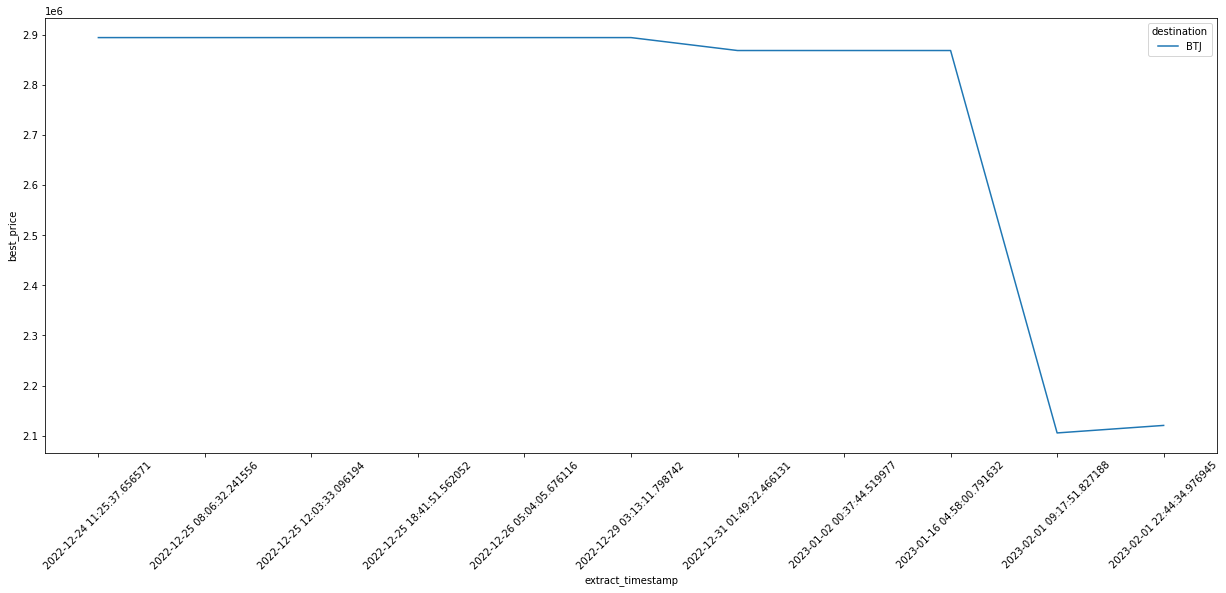

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

# filter the destination
filter = (df_new['destination'].isin(['BTJ'])) & (df_new['depart_date'] == '2023-04-19')
display(df_new[filter].sort_values('extract_timestamp', ascending=True))

# visualisation
plt.figure(figsize=(21,8))
sns.lineplot(x='extract_timestamp', y='best_price', hue='destination', data=df_new[filter].sort_values('extract_timestamp', ascending=True))
plt.xticks(rotation=45)

##### Make sure no alphanumeric entries in the `best_price` column

In [10]:
df_new.best_price.apply(lambda x: float(x))

0        2310582.0
1        2310582.0
2        2310582.0
3        2310582.0
4        2316313.0
           ...    
45433    4786080.0
45434    4786080.0
45435    4786080.0
45436    4786080.0
45437    4786080.0
Name: best_price, Length: 45438, dtype: float64

##### Check the departure date

In [11]:
df_new.depart_date.value_counts()

2023-04-04    404
2023-04-06    401
2023-04-01    401
2023-04-05    400
2023-04-03    399
             ... 
2024-04-23      1
2024-05-23      1
2024-05-08      1
2024-06-07      1
2024-06-22      1
Name: depart_date, Length: 233, dtype: int64

In [12]:
pd.read_csv(output_file, sep='|').extract_timestamp.value_counts()

2022-12-29 03:13:11.798742    5203
2022-12-31 01:49:22.466131    5203
2023-02-01 09:17:51.827188    5202
2023-02-01 22:44:34.976945    5184
2023-01-02 00:37:44.519977    5174
2023-01-16 04:58:00.791632    4775
2023-01-05 05:03:39.672048    3480
2023-01-09 02:03:48.781163    3480
2023-01-15 22:27:10.250346    3364
2022-12-24 11:25:37.656571     866
2022-12-25 08:06:32.241556     866
2022-12-25 12:03:33.096194     866
2022-12-25 18:41:51.562052     866
2022-12-26 05:04:05.676116     866
2023-01-01 02:09:16.289170      43
Name: extract_timestamp, dtype: int64